In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from sklearn import preprocessing, cross_validation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Number of estimated clusters: 3


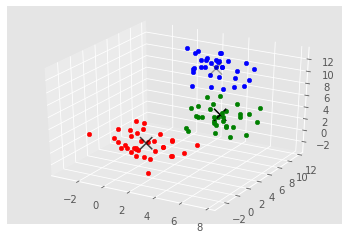

In [2]:
centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

#print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [6]:
df = pd.read_excel('C:/Users/HP/Downloads/titanic.xls')
original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [7]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

original_df['cluster_group']=np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]
        
n_clusters_ = len(np.unique(labels))
survival_rates = {}

for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.3734076433121019, 1: 0.6666666666666666, 2: 1.0, 3: 0.1}


In [12]:
original_df[ (original_df['cluster_group']==0)].describe()

,pclass,survived,age,sibsp,parch,fare,body,cluster_group
count,1256.000000,1256.000000,995.000000,1256.000000,1256.000000,1255.000000,115.000000,1256.0
mean,2.332803,0.373408,29.553518,0.486465,0.309713,26.038270,160.756522,0.0
std,0.818554,0.483902,14.298459,1.047011,0.658697,29.781427,98.718863,0.0
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.0
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,69.500000,0.0
50%,3.000000,0.000000,28.000000,0.000000,0.000000,13.500000,165.000000,0.0
75%,3.000000,1.000000,38.000000,1.000000,0.000000,28.500000,257.000000,0.0
max,3.000000,1.000000,80.000000,8.000000,4.000000,227.525000,328.000000,0.0


In [13]:
original_df[ (original_df['cluster_group']==1)].describe()

,pclass,survived,age,sibsp,parch,fare,body,cluster_group
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,4.000000,39.0
mean,1.025641,0.666667,35.049146,0.871795,1.358974,215.284723,125.500000,1.0
std,0.160128,0.477567,17.039874,0.950886,1.158201,53.910146,21.794495,0.0
min,1.000000,0.000000,0.916700,0.000000,0.000000,39.000000,96.000000,1.0
25%,1.000000,0.000000,24.000000,0.000000,0.000000,211.337500,117.000000,1.0
50%,1.000000,1.000000,31.000000,1.000000,1.000000,227.525000,129.500000,1.0
75%,1.000000,1.000000,47.500000,1.000000,2.000000,262.375000,138.000000,1.0
max,2.000000,1.000000,67.000000,3.000000,4.000000,263.000000,147.000000,1.0


In [14]:
original_df[ (original_df['cluster_group']==2)].describe()

,pclass,survived,age,sibsp,parch,fare,body,cluster_group
count,4.0,4.0,4.000000,4.0,4.00000,4.0000,0.0,4.0
mean,1.0,1.0,41.000000,0.0,0.50000,512.3292,NaN,2.0
std,0.0,0.0,11.343133,0.0,0.57735,0.0000,NaN,0.0
min,1.0,1.0,35.000000,0.0,0.00000,512.3292,NaN,2.0
25%,1.0,1.0,35.000000,0.0,0.00000,512.3292,NaN,2.0
50%,1.0,1.0,35.500000,0.0,0.50000,512.3292,NaN,2.0
75%,1.0,1.0,41.500000,0.0,1.00000,512.3292,NaN,2.0
max,1.0,1.0,58.000000,0.0,1.00000,512.3292,NaN,2.0


In [15]:
original_df[ (original_df['cluster_group']==3)].describe()

,pclass,survived,age,sibsp,parch,fare,body,cluster_group
count,10.0,10.000000,8.000000,10.000000,10.000000,10.000000,2.000000,10.0
mean,3.0,0.100000,39.875000,0.800000,6.000000,42.703750,234.500000,3.0
std,0.0,0.316228,1.552648,0.421637,1.632993,15.590194,130.814755,0.0
min,3.0,0.000000,38.000000,0.000000,5.000000,29.125000,142.000000,3.0
25%,3.0,0.000000,39.000000,1.000000,5.000000,31.303125,188.250000,3.0
50%,3.0,0.000000,39.500000,1.000000,5.000000,35.537500,234.500000,3.0
75%,3.0,0.000000,40.250000,1.000000,6.000000,46.900000,280.750000,3.0
max,3.0,1.000000,43.000000,1.000000,9.000000,69.550000,327.000000,3.0


0.07029391517109565


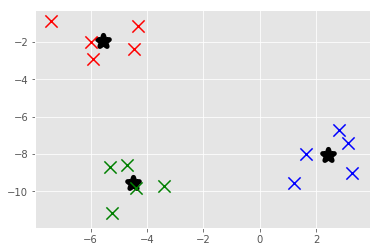

In [21]:
X, y = make_blobs(n_samples=15, centers=3, n_features=2)
##X = np.array([[1, 2],
##              [1.5, 1.8],
##              [5, 8],
##              [8, 8],
##              [1, 0.6],
##              [9, 11],
##              [8, 2],
##              [10, 2],
##              [9, 3]])


##plt.scatter(X[:, 0],X[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
##plt.show()

'''
1. Start at every datapoint as a cluster center

2. take mean of radius around cluster, setting that as new cluster center

3. Repeat #2 until convergence.

'''

class Mean_Shift:
    def __init__(self, radius = None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    def fit(self,data):

        if self.radius == None:
            all_data_centroid = np.average(data,axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm/self.radius_norm_step
            print(self.radius)

        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

        weights = [i for i in range(self.radius_norm_step)][::-1]    
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:

                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1

                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth +=to_add

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            to_pop = []

            for i in uniques:
                for ii in [i for i in uniques]:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        #print(np.array(i), np.array(ii))
                        to_pop.append(ii) # You cannot modify a list while iterating through it
                        break

            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass

            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False

            if optimized:
                break
            
        self.centroids = centroids
        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            #compare distance to either centroid
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            #print(distances)
            classification = (distances.index(min(distances)))

            # featureset that belongs to that cluster
            self.classifications[classification].append(featureset)


    def predict(self,data):
        #compare distance to either centroid
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = (distances.index(min(distances)))
        return classification



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids
#print(centroids)

colors = 10*['r','g','b','c','k','y']

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker = "x", color=color, s=150, linewidths = 5, zorder = 10)

for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color='k', marker = "*", s=150, linewidths = 5)

plt.show()